# Construimos un algoritmo que arme una red según las especificaciones
En este caso será para una red con una sola capa oculta y con la posibilidad de escoger la funcion de activación de la capa oculta así como el número de nodos que tendrá. Los nodos de las capas de entrada y salida estarán definidos por los propios datos X,Y

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import floor
from keras import models
from keras import layers
from keras import optimizers


## Funciones de activación

In [2]:
# RELU
def relu(x):
    return x * (x > 0)

def drelu(x):
    return 1. * (x > 0)

#IDENTIDAD
def iden(X):
    return X
def diden(X):
    return 1

#SIGMOIDE
def sigmoid(X):
    return 1/(1+np.exp(-X))
def dsigmoid(X):
    return sigmoid(X)*(1-sigmoid(X))

#TANGENTE HIPORBÓLICA
def tanh(X):
    return np.tanh(X)
def dtanh(X):
    return 1-tanh(X)**2

#Definimos el forward propagation por si se quiere evaluar un determiado valor después de haber entrenado la red
def forward(X,W1,b1,W2,b2,activation):
    z1=np.dot(X,W1)+b1
    a1=activation(z1)
    z2=np.dot(a1,W2)+b2
    a2=z2
    return a2


## Minibatch
Toma el conjunto de datos X, Y y los separa en dos grupos, los datos que seránusados para el entrenamiento, y los que serán usados como validación.

Se le indicará el porcentaje que queremos para validación

In [3]:
def split(X,Y,porcent): #El porcentaje debe estar dado entre 0 y 1
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    
    return X_learn,Y_learn,X_val,Y_val


## Función de coste

In [4]:
#función de coste:
def error(C):
    m=len(C)
    e=(1/(2*m))*np.linalg.norm(C)**2
    return e

## Neural Network

In [5]:
def neuralnet(X,Y,nodos,batch_size,learning_rate,epocas,activation,dactivation):
    #Definimos la estructura de la red
    n_entradas=len(X[0])
    n_salidas=len(Y[0])
    
    #definimos los conjuntos de aprendizaje y validación 
    X_learn,Y_learn,X_val,Y_val = split(X,Y,batch_size)
    
    #forward
    W1=np.random.randn(n_entradas,nodos)
    W2=np.random.randn(nodos,n_salidas)
    b1=np.random.randn(nodos)
    b2=np.random.randn(n_salidas)
    
    #z1=np.dot(X_learn,W1)+b1
    #a1=activation(z1)
    #z2=np.dot(a1,W2)+b2
    #a2=z2
    
    #épocas
    errores=[]
    validacion=[]
    for i in range(epocas+1):
        #Forward
        z1=np.dot(X_learn,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        
        #backpropagation
        delta2 = a2-Y_learn
        delta1 = (delta2).dot(W2.T)*dactivation(z1)
        
        errores.append(error(delta2)) #guardamos el error de cada época

        W2 -= learning_rate * a1.T.dot(delta2)
        b2 -= learning_rate * (delta2).sum(axis=0)

        W1 -= learning_rate * X_learn.T.dot(delta1)
        b1 -= learning_rate * (delta1).sum(axis=0)
        print("Época %d, coste %f" %(int(i),error(delta2)))
        
        #Ahora validamos el modelo
        z1=np.dot(X_val,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        delta = a2-Y_val
        validacion.append(error(delta))
        
    plt.plot(range(i+1),errores,color='darkcyan',label='Aprendizaje')
    plt.plot(range(i+1),validacion,color='darkred',label='Validación')
    plt.grid()
    plt.legend()
    return W1,b1,W2,b2
        
        

## Red con keras

In [6]:
def redk(X,Y,nodos,split_size,learning_rate,epocas):
    #Separamos los datos en validación y entrenamiento
    X_learn,Y_learn,X_val,Y_val=split(X,Y,split_size)
    
    #Armamos el modelo con estructura 'Sequential'
    model=models.Sequential()

    #la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
    capa1=layers.Dense(nodos, input_shape=(len(X[0]),),use_bias=1,activation='sigmoid')
    #para la capa de salida usamos Id como activación
    salida=layers.Dense(len(Y[0]),use_bias=1)

    #armamos el modelo
    model.add(capa1)
    model.add(salida)
    #Ahora definimos el paso de compilación, con learning rate=0.001
    #Función de error cuadrático medio
    

    model.compile(optimizer=optimizers.RMSprop(lr=learning_rate), loss='mse')

    #por último traemos los datos de entrenamiento y los procesamos con 'fit()'
    history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),batch_size=64,epochs=epocas)
    
    error=history.history['loss']
    exac=history.history['val_loss']
    epochs=np.arange(0,len(error))
    plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
    plt.plot(epochs,exac,label='Error Validación',color='r')
    plt.legend()
    plt.grid()
    plt.title('Error durante el entrenamiento',color='red')

In [50]:
#Función a emular
def F(x):
    return -x**2
X=3*np.random.rand(1000,1)
Y=[]
for x in X:
    y=F(x)
    y=y+np.random.uniform(-0.1,0.1)
    Y.append(y)
Y=np.array(Y)

Época 0, coste 22.322925
Época 1, coste 17.128582
Época 2, coste 13.414345
Época 3, coste 10.753667
Época 4, coste 8.842899
Época 5, coste 7.466943
Época 6, coste 6.471987
Época 7, coste 5.748533
Época 8, coste 5.218404
Época 9, coste 4.826251
Época 10, coste 4.532468
Época 11, coste 4.308921
Época 12, coste 4.135563
Época 13, coste 3.998126
Época 14, coste 3.886454
Época 15, coste 3.793282
Época 16, coste 3.713454
Época 17, coste 3.643309
Época 18, coste 3.580264
Época 19, coste 3.522447
Época 20, coste 3.468509
Época 21, coste 3.417515
Época 22, coste 3.368815
Época 23, coste 3.321905
Época 24, coste 3.276425
Época 25, coste 3.232139
Época 26, coste 3.188842
Época 27, coste 3.146418
Época 28, coste 3.104788
Época 29, coste 3.063889
Época 30, coste 3.023637
Época 31, coste 2.984005
Época 32, coste 2.944964
Época 33, coste 2.906488
Época 34, coste 2.868564
Época 35, coste 2.831168
Época 36, coste 2.794287
Época 37, coste 2.757911
Época 38, coste 2.722037
Época 39, coste 2.686648
Época 

Época 437, coste 0.067560
Época 438, coste 0.067351
Época 439, coste 0.067144
Época 440, coste 0.066940
Época 441, coste 0.066737
Época 442, coste 0.066537
Época 443, coste 0.066339
Época 444, coste 0.066144
Época 445, coste 0.065950
Época 446, coste 0.065759
Época 447, coste 0.065569
Época 448, coste 0.065382
Época 449, coste 0.065197
Época 450, coste 0.065014
Época 451, coste 0.064832
Época 452, coste 0.064653
Época 453, coste 0.064476
Época 454, coste 0.064300
Época 455, coste 0.064127
Época 456, coste 0.063955
Época 457, coste 0.063785
Época 458, coste 0.063617
Época 459, coste 0.063451
Época 460, coste 0.063286
Época 461, coste 0.063123
Época 462, coste 0.062962
Época 463, coste 0.062803
Época 464, coste 0.062645
Época 465, coste 0.062489
Época 466, coste 0.062334
Época 467, coste 0.062182
Época 468, coste 0.062030
Época 469, coste 0.061881
Época 470, coste 0.061732
Época 471, coste 0.061586
Época 472, coste 0.061441
Época 473, coste 0.061297
Época 474, coste 0.061155
Época 475, c

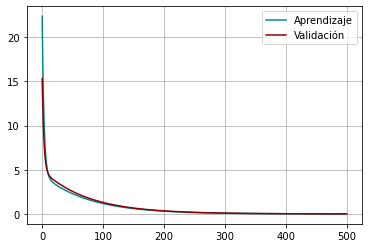

In [51]:
#neuralnet(X,Y,nodos,batch_size,learning_rate,epocas)

W1,b1,W2,b2=neuralnet(X,Y,100,.3,0.000001,500,activation=relu,dactivation=drelu)

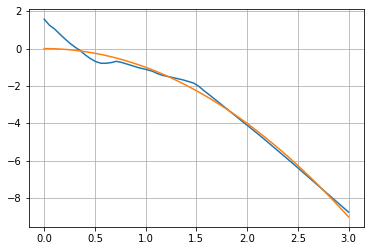

In [55]:
z=np.linspace(0,3,60)
z=z.reshape(60,1)
plt.plot(z,forward(z,W1,b1,W2,b2,relu))
plt.plot(z,-z**2)
plt.grid()

Epoch 1/300
200/200 [==============================] - 1s 1ms/step - loss: 472.1280 - val_loss: 112.0528
Epoch 2/300
200/200 [==============================] - 0s 732us/step - loss: 73.0007 - val_loss: 33.0392
Epoch 3/300
200/200 [==============================] - 0s 664us/step - loss: 17.2564 - val_loss: 9.0068
Epoch 4/300
200/200 [==============================] - 0s 785us/step - loss: 7.5583 - val_loss: 3.9229
Epoch 5/300
200/200 [==============================] - 0s 624us/step - loss: 4.6204 - val_loss: 1.9667
Epoch 6/300
200/200 [==============================] - 0s 760us/step - loss: 2.5976 - val_loss: 2.9504
Epoch 7/300
200/200 [==============================] - 0s 658us/step - loss: 2.3541 - val_loss: 5.7938
Epoch 8/300
200/200 [==============================] - 0s 672us/step - loss: 1.7833 - val_loss: 0.3815
Epoch 9/300
200/200 [==============================] - 0s 673us/step - loss: 1.3061 - val_loss: 0.2855
Epoch 10/300
200/200 [==============================] - 0s 682us/ste

Epoch 80/300
200/200 [==============================] - 0s 723us/step - loss: 0.6061 - val_loss: 0.1274
Epoch 81/300
200/200 [==============================] - 0s 689us/step - loss: 0.6067 - val_loss: 0.0552
Epoch 82/300
200/200 [==============================] - 0s 764us/step - loss: 0.6446 - val_loss: 0.0709
Epoch 83/300
200/200 [==============================] - 0s 794us/step - loss: 0.7404 - val_loss: 0.0758
Epoch 84/300
200/200 [==============================] - 0s 664us/step - loss: 0.5310 - val_loss: 0.4196
Epoch 85/300
200/200 [==============================] - 0s 672us/step - loss: 0.5261 - val_loss: 0.4486
Epoch 86/300
200/200 [==============================] - 0s 617us/step - loss: 0.6807 - val_loss: 0.2998
Epoch 87/300
200/200 [==============================] - 0s 612us/step - loss: 0.6890 - val_loss: 1.6141
Epoch 88/300
200/200 [==============================] - 0s 660us/step - loss: 0.6909 - val_loss: 1.3913
Epoch 89/300
200/200 [==============================] - 0s 672us

200/200 [==============================] - 0s 672us/step - loss: 0.4804 - val_loss: 0.0263
Epoch 159/300
200/200 [==============================] - 0s 611us/step - loss: 0.5589 - val_loss: 0.2583
Epoch 160/300
200/200 [==============================] - 0s 773us/step - loss: 0.6119 - val_loss: 3.9281
Epoch 161/300
200/200 [==============================] - 0s 639us/step - loss: 0.6335 - val_loss: 0.0400
Epoch 162/300
200/200 [==============================] - 0s 672us/step - loss: 0.4906 - val_loss: 0.1453
Epoch 163/300
200/200 [==============================] - 0s 750us/step - loss: 0.5637 - val_loss: 1.0192
Epoch 164/300
200/200 [==============================] - 0s 679us/step - loss: 0.6734 - val_loss: 0.0376
Epoch 165/300
200/200 [==============================] - 0s 642us/step - loss: 0.3771 - val_loss: 0.0636
Epoch 166/300
200/200 [==============================] - 0s 730us/step - loss: 0.4530 - val_loss: 0.0744
Epoch 167/300
200/200 [==============================] - 0s 606us/ste

200/200 [==============================] - 0s 684us/step - loss: 0.3754 - val_loss: 0.0463
Epoch 237/300
200/200 [==============================] - 0s 668us/step - loss: 0.3921 - val_loss: 2.1141
Epoch 238/300
200/200 [==============================] - 0s 602us/step - loss: 0.4107 - val_loss: 1.3778
Epoch 239/300
200/200 [==============================] - 0s 658us/step - loss: 0.3322 - val_loss: 0.7877
Epoch 240/300
200/200 [==============================] - 0s 739us/step - loss: 0.4175 - val_loss: 0.0325
Epoch 241/300
200/200 [==============================] - 0s 784us/step - loss: 0.3723 - val_loss: 0.2054
Epoch 242/300
200/200 [==============================] - 0s 631us/step - loss: 0.4330 - val_loss: 0.0930
Epoch 243/300
200/200 [==============================] - 0s 731us/step - loss: 0.4133 - val_loss: 0.1828
Epoch 244/300
200/200 [==============================] - 0s 829us/step - loss: 0.3354 - val_loss: 0.0232
Epoch 245/300
200/200 [==============================] - 0s 670us/ste

Text(0.5, 1.0, 'Error durante el entrenamiento')

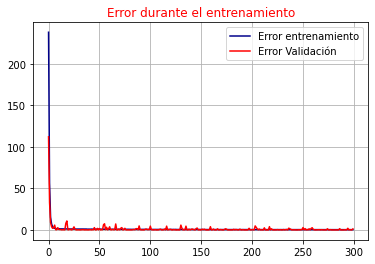

In [190]:
nodos=50
split_size=0.8
learning_rate=0.01
epocas=300

#Separamos los datos en validación y entrenamiento
X_learn,Y_learn,X_val,Y_val=split(X,Y,split_size)

#Armamos el modelo con estructura 'Sequential'
model=models.Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
capa1=layers.Dense(nodos, input_shape=(len(X[0]),),use_bias=1,activation='relu')
#para la capa de salida usamos Id como activación
salida=layers.Dense(len(Y[0]),use_bias=1)

#armamos el modelo
model.add(capa1)
model.add(salida)
#Ahora definimos el paso de compilación, con learning rate=0.001
#Función de error cuadrático medio


model.compile(optimizer=optimizers.RMSprop(lr=learning_rate), loss='mse')

#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),batch_size=4,epochs=epocas,shuffle=True)

error=history.history['loss']
exac=history.history['val_loss']
epochs=np.arange(0,len(error))
plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
plt.plot(epochs,exac,label='Error Validación',color='r')
plt.legend()
plt.grid()
plt.title('Error durante el entrenamiento',color='red')

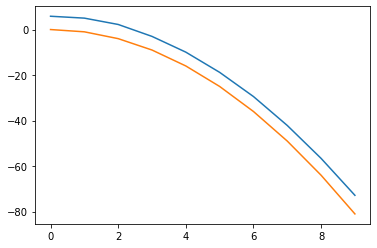

In [192]:
plt.plot(z,model.predict(z))
plt.plot(z,-z**2)

In [26]:
#Función a emular
def G(X):
    return [X[0]**2,X[1]**2]

X = 10*np.random.rand(1000,2)
Y=np.zeros((1000,2))

for i,x in enumerate(X):
    img=G(X[i])
    img=img+np.random.rand(1,2)
    Y[i,:]=img
    